# HR Analytics: Job Change of Data Scientists

## About Dataset
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [116]:
df=pd.read_csv(r"C:\Users\muhammedhanbaba\OneDrive - Ege Üniversitesi\Masaüstü\Yeni klasör\hranalytics.csv")

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Features


**enrollee_id** : Unique ID for candidate

**city**: City code

**city_ development _index** : Developement index of the city (scaled)

**gender**: Gender of candidate

**relevent_experience**: Relevant experience of candidate

**enrolled_university**: Type of University course enrolled if any

**education_level**: Education level of candidate

**major_discipline** :Education major discipline of candidate

**experience**: Candidate total experience in years

**company_size**: No of employees in current employer's company

**company_type** : Type of current employer

**lastnewjob**: Difference in years between previous job and current job

**training_hours**: training hours completed

**target**: 0 – Not looking for job change, 1 – Looking for a job change

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [7]:
check_df(df)

##################### Shape #####################
(19158, 14)
##################### Types #####################
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object
##################### Head #####################
   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Mal

In [8]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
df.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
df.replace(to_replace = 'No relevent experience',value='No',inplace = True )

df.replace(to_replace = '<1',value = '0',inplace = True)
df.replace(to_replace = '>20',value = '21',inplace=True)
df.replace(to_replace = 'never',value = '0',inplace=True)
df.replace(to_replace = '>4',value = '5',inplace=True)

df.replace(to_replace = '<10',value = 'around_10',inplace=True)
df.replace(to_replace = '10/49',value = 'around_50',inplace=True)
df.replace(to_replace = '50-99',value = 'around_100',inplace=True)
df.replace(to_replace = '100-500',value = 'around_500',inplace=True)
df.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
df.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
df.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
df.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

df.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
df.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

df.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
df.replace(to_replace = 'High School',value = 'High_School',inplace=True)

df.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
df.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

df.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
df.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
df.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
df.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

df['major_discipline'].replace('Other','Other_major',inplace=True)
df['company_type'].replace('Other','Other_type',inplace=True)

In [10]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No,no_enrollment,Graduate,STEM,15,around_100,Pvt_Ltd,5,47,0.0
2,11561,city_21,0.624,NaN,No,Full_time_course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,city_115,0.789,NaN,No,NaN,Graduate,Business_Degree,0,NaN,Pvt_Ltd,0,52,1.0
4,666,city_162,0.767,Male,Yes,no_enrollment,Masters,STEM,21,around_100,Funded_Startup,4,8,0.0


In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 19158
Variables: 14
cat_cols: 9
num_cols: 3
cat_but_car: 2
num_but_cat: 1


#### ANALYSIS OF CATEGORICAL VARIABLES

In [13]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [14]:
for col in cat_cols:
    cat_summary(df, col)

        gender      Ratio
Male     13221  69.010335
Female    1238   6.462052
Other      191   0.996973
##########################################
     relevent_experience      Ratio
Yes                13792  71.990813
No                  5366  28.009187
##########################################
                  enrolled_university      Ratio
no_enrollment                   13817  72.121307
Full_time_course                 3757  19.610607
Part_time_course                 1198   6.253262
##########################################
                education_level      Ratio
Graduate                  11598  60.538678
Masters                    4361  22.763336
High_School                2017  10.528239
Phd                         414   2.160977
Primary_School              308   1.607683
##########################################
                 major_discipline      Ratio
STEM                        14492  75.644639
Humanities                    669   3.492014
Other_major                

#### Analysis of Numerical Variables

In [15]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    19158.000000
mean     16875.358179
std       9616.292592
min          1.000000
5%        1782.850000
10%       3535.100000
20%       6858.800000
30%      10305.100000
40%      13583.800000
50%      16982.500000
60%      20266.200000
70%      23558.900000
80%      26843.600000
90%      30142.300000
95%      31782.150000
99%      33088.290000
max      33380.000000
Name: enrollee_id, dtype: float64


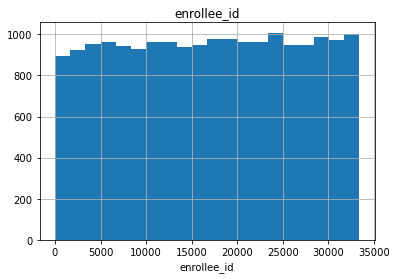

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
5%           0.624000
10%          0.624000
20%          0.691000
30%          0.776000
40%          0.878000
50%          0.903000
60%          0.920000
70%          0.920000
80%          0.920000
90%          0.925000
95%          0.926000
99%          0.939000
max          0.949000
Name: city_development_index, dtype: float64


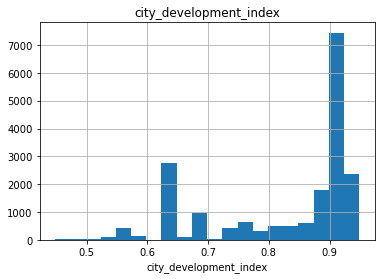

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
5%           7.000000
10%         11.000000
20%         19.000000
30%         27.000000
40%         37.000000
50%         47.000000
60%         58.000000
70%         78.000000
80%        101.000000
90%        146.000000
95%        188.000000
99%        302.000000
max        336.000000
Name: training_hours, dtype: float64


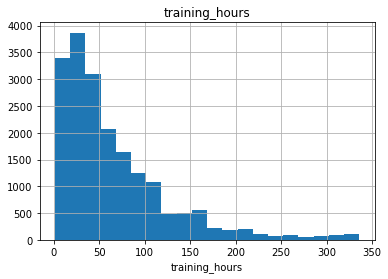

In [16]:
for col in num_cols:
    num_summary(df, col, plot=True)
#df[num_cols].describe().T

#### NUMERICAL VARIABLES - TARGET VARIABLE ANALYSIS

In [17]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")

In [18]:
for col in num_cols:
    target_summary_with_num(df, "target", col)

         enrollee_id
target              
0.0     16601.160907
1.0     17700.819971


        city_development_index
target                        
0.0                   0.853139
1.0                   0.755719


        training_hours
target                
0.0          66.113761
1.0          63.118484




#### CATEGORICAL VARIABLES - TARGET VARIABLE ANALYSIS

In [19]:
def target_summary_with_cat(dataframe, target, cat_col):
    print(cat_col)
    print(pd.DataFrame({"Target_Mean":dataframe.groupby(cat_col)[target].mean(),
                        "Count": dataframe[cat_col].value_counts(),
                        "Ratio":100* dataframe[cat_col].value_counts() / len(dataframe) 
                       }), end="\n\n\n")

In [20]:
for col in cat_cols:
    target_summary_with_cat(df,"target",col)

gender
        Target_Mean  Count      Ratio
Female     0.263328   1238   6.462052
Male       0.227819  13221  69.010335
Other      0.261780    191   0.996973


relevent_experience
     Target_Mean  Count      Ratio
No      0.338427   5366  28.009187
Yes     0.214690  13792  71.990813


enrolled_university
                  Target_Mean  Count      Ratio
Full_time_course     0.380889   3757  19.610607
Part_time_course     0.252087   1198   6.253262
no_enrollment        0.211406  13817  72.121307


education_level
                Target_Mean  Count      Ratio
Graduate           0.279790  11598  60.538678
High_School        0.195340   2017  10.528239
Masters            0.214400   4361  22.763336
Phd                0.140097    414   2.160977
Primary_School     0.133117    308   1.607683


major_discipline
                 Target_Mean  Count      Ratio
Arts                0.209486    253   1.320597
Business_Degree     0.262997    327   1.706859
Humanities          0.210762    669   3.492014

#### MISSING VALUE ANALYSIS

In [21]:
df.isna().sum()/df.shape[0]*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

Columns in which we have 2% or less than 2% null values we can drop those null values

In [22]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [23]:
# after dropping those null values
df.shape

(18014, 14)

Now we are going to fill null values with their mode as all the columns left have dtype as 'object'

In [24]:
col_mode = ['gender','company_size','major_discipline','company_type','relevent_experience']
for col in col_mode:
    df[col].fillna(df[col].mode()[0],inplace=True)

Let's change the dtype of experience and last_new_job column

In [25]:
df = df.astype({'experience':int,'last_new_job':int})

In [26]:
cat_cols=[col for col in cat_cols if col not in ["target"]]

In [27]:
cat_cols

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job']

In [28]:
dff = df.copy()

In [29]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [30]:
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [31]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [32]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [33]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [34]:
for col in num_cols:
    print(col, check_outlier(df, col))

enrollee_id False
city_development_index False
training_hours False


In [35]:
# Create categorical variable from experience variable

In [36]:
df.loc[(df["experience"]>= 0) & (df["experience"]<=5), "new_experience"]= "junior"
df.loc[(df["experience"]>= 5) & (df["experience"]<=10), "new_experience"]= "middle"
df.loc[(df["experience"]>= 10) & (df["experience"]<=15), "new_experience"]= "senior"
df.loc[(df["experience"]>= 15) & (df["experience"]<=21), "new_experience"]= "lead"

In [37]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_experience
0,8949,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,around_100,Pvt_Ltd,1,36,1.0,lead
1,29725,city_40,0.776,Male,No,no_enrollment,Graduate,STEM,15,around_100,Pvt_Ltd,5,47,0.0,lead
2,11561,city_21,0.624,Male,No,Full_time_course,Graduate,STEM,5,around_100,Pvt_Ltd,0,83,0.0,middle
4,666,city_162,0.767,Male,Yes,no_enrollment,Masters,STEM,21,around_100,Funded_Startup,4,8,0.0,lead
5,21651,city_176,0.764,Male,Yes,Part_time_course,Graduate,STEM,11,around_100,Pvt_Ltd,1,24,1.0,senior


In [38]:
df["new_small_enterprises"] = df["company_size"].apply(lambda x: 1 if x in ["around_10", "around_50"] else 0)
df["new_medium_enterprises"] = df["company_size"].apply(lambda x: 1 if x in ["around_100", "around_500"] else 0)
df["new_large_enterprises"] = df["company_size"].apply(lambda x: 1 if x in ["around_10000", "around_5000","around_10000"] else 0)
df["new_holding_enterprises"] = df["company_size"].apply(lambda x: 1 if x in ["more_than_10000"] else 0)

I renamed the"relevent experience" variable name.

In [39]:
df = df.rename(columns = {"relevent_experience": "relevant_experience"})

In [40]:
df.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_experience,new_small_enterprises,new_medium_enterprises,new_large_enterprises,new_holding_enterprises
0,8949,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,around_100,Pvt_Ltd,1,36,1.0,lead,0,1,0,0
1,29725,city_40,0.776,Male,No,no_enrollment,Graduate,STEM,15,around_100,Pvt_Ltd,5,47,0.0,lead,0,1,0,0
2,11561,city_21,0.624,Male,No,Full_time_course,Graduate,STEM,5,around_100,Pvt_Ltd,0,83,0.0,middle,0,1,0,0
4,666,city_162,0.767,Male,Yes,no_enrollment,Masters,STEM,21,around_100,Funded_Startup,4,8,0.0,lead,0,1,0,0
5,21651,city_176,0.764,Male,Yes,Part_time_course,Graduate,STEM,11,around_100,Pvt_Ltd,1,24,1.0,senior,0,1,0,0


In [41]:
df.shape

(18014, 19)

#### ENCODING

In [42]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 18014
Variables: 19
cat_cols: 14
num_cols: 4
cat_but_car: 1
num_but_cat: 6


*LABEL ENCODING*

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [45]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['relevant_experience']

In [46]:
for col in binary_cols:
    df = label_encoder(df, col)

*One-Hot Encoding*

In [47]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["target"]]
cat_cols

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'new_experience',
 'last_new_job',
 'new_small_enterprises',
 'new_medium_enterprises',
 'new_large_enterprises',
 'new_holding_enterprises']

In [48]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [49]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [50]:
df.shape

(18014, 44)

In [51]:
df.head()

,enrollee_id,city,city_development_index,relevant_experience,experience,training_hours,target,gender_Male,gender_Other,enrolled_university_Part_time_course,...,new_experience_senior,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_5,new_small_enterprises_1,new_medium_enterprises_1,new_large_enterprises_1,new_holding_enterprises_1
0,8949,city_103,0.920,1,21,36,1.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,29725,city_40,0.776,0,15,47,0.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,11561,city_21,0.624,0,5,83,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,666,city_162,0.767,1,21,8,0.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5,21651,city_176,0.764,1,11,24,1.0,1,0,1,...,1,1,0,0,0,0,0,1,0,0


#### MODELLING

In [52]:
#Base model

In [53]:
y = df["target"]
X = df.drop(["target","enrollee_id","city"], axis=1)

In [54]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [55]:
base_models(X, y,"accuracy")

Base Models....


C:\Users\muhammedhanbaba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\muhammedhanbaba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

accuracy: 0.7706 (LR) 
accuracy: 0.7198 (KNN) 
accuracy: 0.7546 (SVC) 
accuracy: 0.7058 (CART) 
accuracy: 0.7683 (RF) 
accuracy: 0.7773 (Adaboost) 
accuracy: 0.7846 (GBM) 
accuracy: 0.7731 (XGBoost) 
accuracy: 0.7828 (LightGBM) 


#### Automated Hyperparameter Optimization

In [56]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [57]:
def hyperparameter_optimization(X, y, cv=3, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [58]:
best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
accuracy (Before): 0.7198
accuracy (After): 0.7546
KNN best params: {'n_neighbors': 48}

########## CART ##########
accuracy (Before): 0.7052
accuracy (After): 0.7845
CART best params: {'max_depth': 5, 'min_samples_split': 13}

########## RF ##########
accuracy (Before): 0.7703
accuracy (After): 0.7813
RF best params: {'max_depth': 15, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
accuracy (Before): 0.7731
accuracy (After): 0.7857
XGBoost best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}

########## LightGBM ##########
accuracy (Before): 0.7828
accuracy (After): 0.7882
LightGBM best params: {'learning_rate': 0.01, 'n_estimators': 300}



In [84]:
gbm_model=GradientBoostingClassifier()

In [107]:
gbm_params = {"learning_rate": [0.01,0.03, 0.05,],
              "max_depth": [3, 5, 10],
              "n_estimators": [450, 500, 550],
              "subsample": [1, 0.7]}

In [108]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [109]:
gbm_best.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

#### Final Model

In [110]:
gbm_final=gbm_model.set_params(**gbm_best.best_params_).fit(X,y)

In [111]:
cv_results=cross_validate(gbm_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [112]:
cv_results['test_accuracy'].mean()

0.7873874769359792

In [113]:
cv_results['test_f1'].mean()

0.5028472371772446

In [115]:
cv_results['test_roc_auc'].mean()

0.7904176433353112